In [1]:
# imports
%matplotlib inline
# %pylab osx
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
plt.style.use('ggplot')

## Generate Test Data

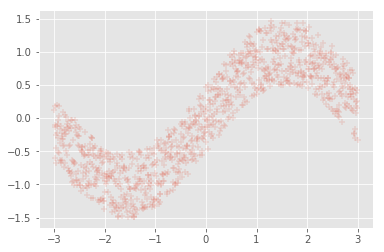

In [2]:
n_observations = 1000
xs = np.linspace(-3, 3, n_observations)
ys = np.sin(xs) + np.random.uniform(-0.5, 0.5, n_observations)
plt.scatter(xs, ys, alpha=0.15, marker='+')

In [3]:
sess = tf.InteractiveSession()

### Define Model (linear regression : y = ax + b)

In [4]:
# Model
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

W = tf.Variable(tf.random_normal([1], dtype=tf.float32, stddev=0.1), name='weight')
B = tf.Variable(tf.constant([0], dtype=tf.float32), name='bias')

Y_pred = X * W + B

### Define Cost & Set Optimizer

In [5]:
# Cost Function
cost = tf.reduce_mean(tf.pow(Y_pred-Y,2))

learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

## Train

In [6]:
def train(X, Y, Y_pred, cost, n_iterations=100, batch_size=200, learning_rate=0.02):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
    fig, ax = plt.subplots(1, 1)
    ax.scatter(xs, ys, alpha=0.15, marker='+')
    ax.set_xlim([-4, 4])
    ax.set_ylim([-2, 2])
    with tf.Session() as sess:
        # Here we tell tensorflow that we want to initialize all
        # the variables in the graph so we can use them
        # This will set W and b to their initial random normal value.
        sess.run(tf.global_variables_initializer())

        # We now run a loop over epochs
        prev_training_cost = 0.0
        for it_i in range(n_iterations):
            idxs = np.random.permutation(range(len(xs)))
            n_batches = len(idxs) // batch_size
            for batch_i in range(n_batches):
                idxs_i = idxs[batch_i * batch_size: (batch_i + 1) * batch_size]
                sess.run(optimizer, feed_dict={X: xs[idxs_i], Y: ys[idxs_i]})

            training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})

            if it_i % 10 == 0:
                ys_pred = Y_pred.eval(feed_dict={X: xs}, session=sess)
                ax.plot(xs, ys_pred, 'k', alpha=it_i / n_iterations)
                print(training_cost)
    fig.show()
    plt.draw()

0.314653
0.241695
0.24168
0.241681
0.24168
0.24168
0.241687
0.24168
0.241684
0.241679


/Users/sungju/Dropbox/OpenSource/sj/lecture/envLEC/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


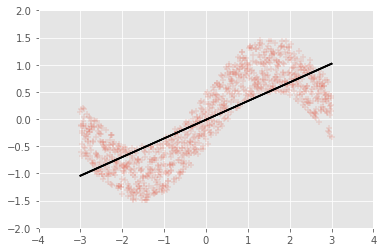

In [7]:
train(X, Y, Y_pred, cost, n_iterations=100, batch_size=200, learning_rate=0.02)

 - - -

## polynomial regression

In [8]:
tf.reset_default_graph()

0.692226
0.432794
0.287486
0.206587
0.158002
0.130086
0.112722
0.102573
0.0969834
0.0923965


/Users/sungju/Dropbox/OpenSource/sj/lecture/envLEC/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


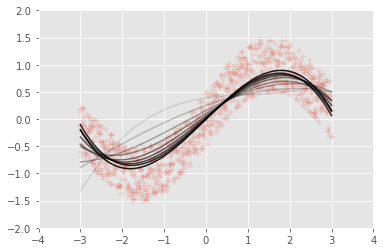

In [10]:
# Model
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32, name='Y')
Y_pred = tf.Variable(tf.random_normal([1]))

for pow_i in range(0, 4):
    W = tf.Variable(
        tf.random_normal([1], stddev=0.1), name='weight_%d' % pow_i)
    Y_pred = tf.add(tf.multiply(tf.pow(X, pow_i), W), Y_pred)
    
cost = tf.reduce_mean(tf.pow(Y_pred-Y,2))
# And then we'll retrain with our new Y_pred
train(X, Y, Y_pred, cost, n_iterations=100, batch_size=200, learning_rate=0.005)


- - -

## Nonlineararities, Activation Function

In [11]:
if sess:
    sess.close()
sess = tf.InteractiveSession()

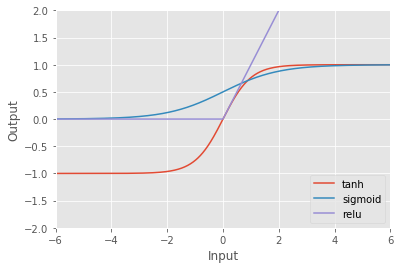

In [12]:
x = np.linspace(-6,6,1000)
plt.plot(x, tf.nn.tanh(x).eval(), label='tanh')
plt.plot(x, tf.nn.sigmoid(x).eval(), label='sigmoid')
plt.plot(x, tf.nn.relu(x).eval(), label='relu')
plt.legend(loc='lower right')
plt.xlim([-6, 6])
plt.ylim([-2, 2])
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid('on')

0.460926
0.194289
0.120841
0.0961494
0.0875307
0.0852033
0.0857852
0.0839637
0.084554
0.0837966


/Users/sungju/Dropbox/OpenSource/sj/lecture/envLEC/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


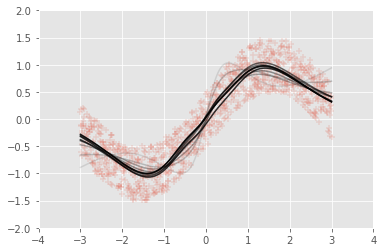

In [13]:
n_neurons = 200

# model
W = tf.Variable(tf.random_normal([1, n_neurons]), name='W')
b = tf.Variable(tf.constant(0, dtype=tf.float32, shape=[n_neurons]), name='b')
h = tf.nn.tanh(tf.matmul(tf.expand_dims(X, 1), W) + b, name='h')

Y_pred = tf.reduce_sum(h, 1)

cost = tf.reduce_mean(tf.pow(Y_pred-Y,2))

train(X, Y, Y_pred, cost, n_iterations=100, batch_size=100, learning_rate=0.01)

- - -

# Word2Vec

In [14]:
import collections
import math
import random
import tensorflow as tf
import zipfile
from urllib.request import urlretrieve
from sklearn.manifold import TSNE

In [15]:
url = 'http://mattmahoney.net/dc/'

def maybe_download(filename, expected_bytes):
  if not os.path.exists(filename):
    filename, _ = urlretrieve(url + filename, filename)
  statinfo = os.stat(filename)
  if statinfo.st_size == expected_bytes:
    print('Found and verified %s' % filename)
  else:
    print(statinfo.st_size)
    raise Exception(
      'Failed to verify ' + filename + '. down load this file on browser')
  return filename

filename = maybe_download('text8.zip', 31344016)

Found and verified text8.zip


In [16]:
def read_data(filename):
  f = zipfile.ZipFile(filename)
  for name in f.namelist():
    return tf.compat.as_str(f.read(name)).split()
  f.close()
  
words = read_data(filename)
print(words[:300])
print('Data size %d' % len(words))

['anarchism', 'originated', 'as', 'a', 'term', 'of', 'abuse', 'first', 'used', 'against', 'early', 'working', 'class', 'radicals', 'including', 'the', 'diggers', 'of', 'the', 'english', 'revolution', 'and', 'the', 'sans', 'culottes', 'of', 'the', 'french', 'revolution', 'whilst', 'the', 'term', 'is', 'still', 'used', 'in', 'a', 'pejorative', 'way', 'to', 'describe', 'any', 'act', 'that', 'used', 'violent', 'means', 'to', 'destroy', 'the', 'organization', 'of', 'society', 'it', 'has', 'also', 'been', 'taken', 'up', 'as', 'a', 'positive', 'label', 'by', 'self', 'defined', 'anarchists', 'the', 'word', 'anarchism', 'is', 'derived', 'from', 'the', 'greek', 'without', 'archons', 'ruler', 'chief', 'king', 'anarchism', 'as', 'a', 'political', 'philosophy', 'is', 'the', 'belief', 'that', 'rulers', 'are', 'unnecessary', 'and', 'should', 'be', 'abolished', 'although', 'there', 'are', 'differing', 'interpretations', 'of', 'what', 'this', 'means', 'anarchism', 'also', 'refers', 'to', 'related', 'so

In [17]:
vocabulary_size = 50000

def build_dataset(words):
  count = [['UNK', -1]]
  count.extend(collections.Counter(words).most_common(vocabulary_size - 1))
  dictionary = dict()
  for word, _ in count:
    #print(word+ ": "+str(len(dictionary)))
    dictionary[word] = len(dictionary)
    
  data = list()
  unk_count = 0
  for word in words:
    if word in dictionary:
      index = dictionary[word]
    else:
      index = 0  # dictionary['UNK']
      unk_count = unk_count + 1
    data.append(index)
  count[0][1] = unk_count
  reverse_dictionary = dict(zip(dictionary.values(), dictionary.keys())) 
  return data, count, dictionary, reverse_dictionary

data, count, dictionary, reverse_dictionary = build_dataset(words)
print('Most common words (+UNK)', count[:5])
print('Sample data', data[:10])

del words  # Hint to reduce memory.

Most common words (+UNK) [['UNK', 418391], ('the', 1061396), ('of', 593677), ('and', 416629), ('one', 411764)]
Sample data [5234, 3081, 12, 6, 195, 2, 3134, 46, 59, 156]


In [18]:
data_index = 0

"""
minibatch를 생성하는 함수.
data_index는 global로 선언되어 여기서는 static의 역할을 함. 즉, 이 함수가 계속 재호출되어도 data_index의 값은 유지된다.

:param batch_size   : batch_size.
:param num_skips    : context window 내에서 (target, context) pair를 얼마나 생성할 지.
:param skip_window  : context window size. skip-gram 모델은 타겟 단어로부터 주변 단어를 예측하는데, skip_window가 그 주변 단어의 범위를 한정한다.
:return batch       : mini-batch of data.
:return labels      : labels of mini-batch. [batch_size][1] 의 2d array.
"""
def generate_batch(batch_size, num_skips, skip_window):
  global data_index
  assert batch_size % num_skips == 0
  assert num_skips <= 2 * skip_window
  batch = np.ndarray(shape=(batch_size), dtype=np.int32)
  labels = np.ndarray(shape=(batch_size, 1), dtype=np.int32)
  span = 2 * skip_window + 1 # [ skip_window target skip_window ]
  buffer = collections.deque(maxlen=span)
  for _ in range(span): #spnan =3 ['anarchism', 'originated', 'as'] as idx
    buffer.append(data[data_index]) # buffer = [5237, 3082, 12]
    data_index = (data_index + 1) % len(data)
  for i in range(batch_size // num_skips): # batch_size// num_skips = 4 , number of word 
    target = skip_window  # target label at the center of the buffer
    targets_to_avoid = [ skip_window ]
    for j in range(num_skips): #num_skips = 2 , label of each word
      while target in targets_to_avoid:
        target = random.randint(0, span - 1) # span-1 = 2
      targets_to_avoid.append(target)
      batch[i * num_skips + j] = buffer[skip_window] #buffer[skip_window] == middle in buffer
      labels[i * num_skips + j, 0] = buffer[target]
    buffer.append(data[data_index]) # buffer = [3082, 12, 6]
    data_index = (data_index + 1) % len(data) # data_index=4
  return batch, labels

print('data:', [reverse_dictionary[di] for di in data[:8]])

for num_skips, skip_window in [(2, 1), (4, 2)]:
    data_index = 0
    batch, labels = generate_batch(batch_size=8, num_skips=num_skips, skip_window=skip_window)
    print('\nwith num_skips = %d and skip_window = %d:' % (num_skips, skip_window))
    print('    batch:', [reverse_dictionary[bi] for bi in batch])
    print('    labels:', [reverse_dictionary[li] for li in labels.reshape(8)])
    print('    labels:', [li for li in labels.reshape(8)])

data: ['anarchism', 'originated', 'as', 'a', 'term', 'of', 'abuse', 'first']

with num_skips = 2 and skip_window = 1:
    batch: ['originated', 'originated', 'as', 'as', 'a', 'a', 'term', 'term']
    labels: ['as', 'anarchism', 'originated', 'a', 'term', 'as', 'of', 'a']
    labels: [12, 5234, 3081, 6, 195, 12, 2, 6]

with num_skips = 4 and skip_window = 2:
    batch: ['as', 'as', 'as', 'as', 'a', 'a', 'a', 'a']
    labels: ['anarchism', 'term', 'originated', 'a', 'of', 'term', 'as', 'originated']
    labels: [5234, 195, 3081, 6, 2, 195, 12, 3081]


In [21]:
batch_size = 128
embedding_size = 128 # Dimension of the embedding vector.
skip_window = 1 # How many words to consider left and right.
num_skips = 2 # How many times to reuse an input to generate a label.
# We pick a random validation set to sample nearest neighbors. here we limit the
# validation samples to the words that have a low numeric ID, which by
# construction are also the most frequent.
valid_size = 16 # Random set of words to evaluate similarity on.
valid_window = 100 # Only pick dev samples in the head of the distribution.
valid_examples = np.array(random.sample(range(valid_window), valid_size))
num_sampled = 64 # Number of negative examples to sample.

graph = tf.Graph()

with graph.as_default():

  # Input data.
  train_dataset = tf.placeholder(tf.int32, shape=[batch_size])
  train_labels = tf.placeholder(tf.float32, shape=[batch_size, 1])
  valid_dataset = tf.constant(valid_examples, dtype=tf.int32)
  
  # Variables.
  embeddings = tf.Variable(
    tf.random_uniform([vocabulary_size, embedding_size], -1.0, 1.0))
  softmax_weights = tf.Variable(
    tf.truncated_normal([vocabulary_size, embedding_size],
                         stddev=1.0 / math.sqrt(embedding_size)))
  softmax_biases = tf.Variable(tf.zeros([vocabulary_size]))
  
  # Model.
  # Look up embeddings for inputs.
  embed = tf.nn.embedding_lookup(embeddings, train_dataset) # 128 ids
  # Compute the softmax loss, using a sample of the negative labels each time.
  loss = tf.reduce_mean(
    tf.nn.sampled_softmax_loss(softmax_weights, softmax_biases, train_labels,embed,
                                num_sampled, vocabulary_size))

  # Optimizer.
  optimizer = tf.train.AdagradOptimizer(1.0).minimize(loss)
  
  # Compute the similarity between minibatch examples and all embeddings.
  # We use the cosine distance:
  norm = tf.sqrt(tf.reduce_sum(tf.square(embeddings), 1, keep_dims=True))
  normalized_embeddings = embeddings / norm
  valid_embeddings = tf.nn.embedding_lookup(
    normalized_embeddings, valid_dataset)
  similarity = tf.matmul(valid_embeddings, tf.transpose(normalized_embeddings))

In [27]:
num_steps = 1000

with tf.Session(graph=graph) as session:
    
  saver = tf.train.Saver()
    
  session.run(tf.global_variables_initializer())
  print('Initialized')
  average_loss = 0
  for step in range(num_steps):
    batch_data, batch_labels = generate_batch(
      batch_size, num_skips, skip_window)
    feed_dict = {train_dataset : batch_data, train_labels : batch_labels}
    _, l = session.run([optimizer, loss], feed_dict=feed_dict)
    average_loss += l
    if step % 2000 == 0:
      if step > 0:
        average_loss = average_loss / 2000
      # The average loss is an estimate of the loss over the last 2000 batches.
      print('Average loss at step %d: %f' % (step, average_loss))
      average_loss = 0
    # note that this is expensive (~20% slowdown if computed every 500 steps)
    if step % 10000 == 0:
      sim = similarity.eval()
      for i in range(valid_size):
        valid_word = reverse_dictionary[valid_examples[i]]
        top_k = 8 # number of nearest neighbors
        nearest = (-sim[i, :]).argsort()[1:top_k+1]
        log = 'Nearest to %s:' % valid_word
        for k in range(top_k):
          close_word = reverse_dictionary[nearest[k]]
          log = '%s %s,' % (log, close_word)
        print(log)
      save_path = saver.save(session, "./word2vec",global_step=step)
      print(save_path)
  final_embeddings = normalized_embeddings.eval()

Initialized
Average loss at step 0: 7.590110
Nearest to war: meher, beadwork, cloud, rubin, hipparcos, abbotsford, neurotransmitter, doraemon,
Nearest to at: navigational, violinist, unflattering, restructured, aeroplanes, thea, receptacle, renn,
Nearest to years: pommel, bukovina, originals, propounded, harding, querying, uzziah, orgasm,
Nearest to more: roundel, broadening, seventies, capabilities, misuse, biometric, athletic, isfahan,
Nearest to was: cryptids, klaus, amt, tripartite, liv, ehud, marin, al,
Nearest to these: wong, griffon, secretes, tolson, maps, afi, dodgson, sweetheart,
Nearest to people: bonnie, ravaging, plethora, optic, melancholia, swedenborg, conventions, hackney,
Nearest to eight: specificity, trainer, romanesque, lippincott, fianc, wands, adjoined, stasis,
Nearest to which: contorted, apulia, nantes, pics, catfish, jiangxi, disfavor, ventricular,
Nearest to had: pliny, fabien, ewen, toxins, percussive, chondrites, keller, transylvania,
Nearest to by: hiatus, 

In [28]:
num_points = 400

tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
two_d_embeddings = tsne.fit_transform(final_embeddings[1:num_points+1, :])

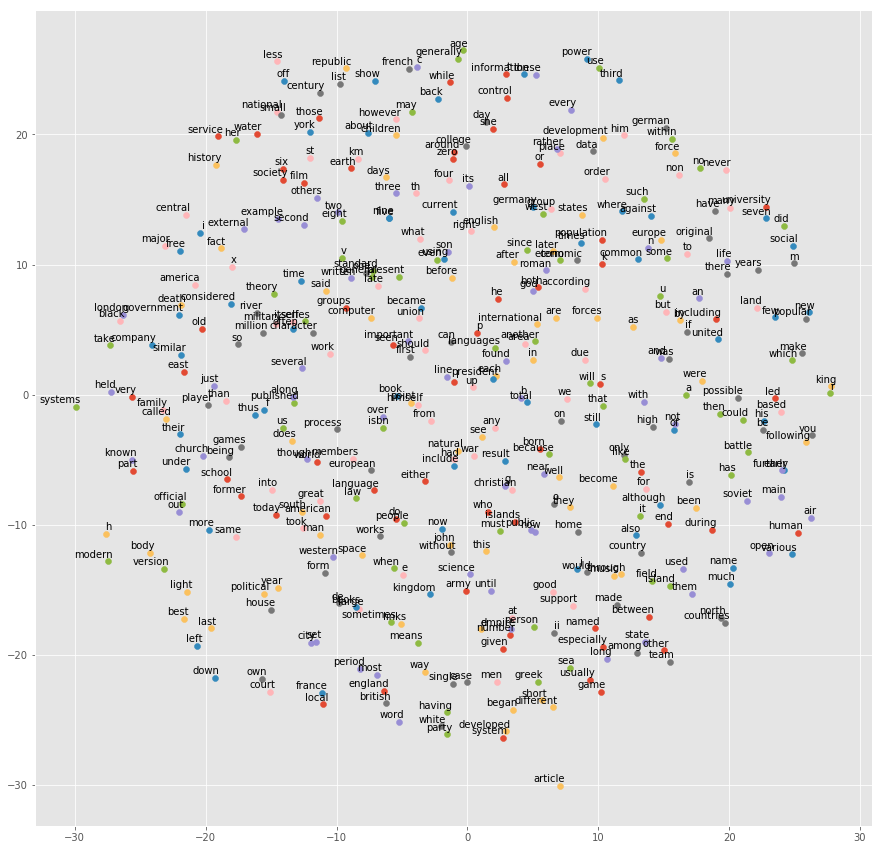

In [32]:
def plot(embeddings, labels):
  assert embeddings.shape[0] >= len(labels), 'More labels than embeddings'
  plt.figure(figsize=(15,15))  # in inches
  for i, label in enumerate(labels):
    x, y = embeddings[i,:]
    plt.scatter(x, y)
    plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points',
                   ha='right', va='bottom')
  plt.show()

words = [reverse_dictionary[i] for i in range(1, num_points+1)]
plot(two_d_embeddings, words)

In [35]:
with tf.Session(graph=graph) as session:
    saver = tf.train.Saver()
    
    saver.restore(session,"./word2vec-0")
    
    a = tf.nn.embedding_lookup(embeddings, [dictionary['man'], dictionary['woman'], dictionary['king']])
    result = session.run(a)
    r = result[2]- result[0]+result[1]
    
    emb = embeddings.eval()
    
    similar_rate = 9999999
    sim_list = []
    most_similar = -1
    for i in range(len(emb)):
        
        sim = np.dot(r,emb[i])/(np.linalg.norm(r)*np.linalg.norm(emb[i]))
        
        sim_list.append((i, sim*sim))
        
        if sim*sim < similar_rate:
            similar_rate = sim*sim
            most_similar = i
            
    sim_list.sort(key=lambda tup: tup[1])
    print(sim_list[-10:])
    print(reverse_dictionary[most_similar])

INFO:tensorflow:Restoring parameters from ./word2vec-0
[(21696, 0.10671947), (6842, 0.10873848), (8302, 0.10917798), (25454, 0.11397669), (879, 0.11580788), (10423, 0.1219553), (40955, 0.1434994), (187, 0.22380179), (1013, 0.27051312), (243, 0.3910844)]
performed
